<a href="https://colab.research.google.com/github/joshIsac/SpeechRecognition-/blob/main/2348523_SPR_DFT_and_DTFT_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math

In [2]:
# @title Implementing Fourier Transform on various signals in the time domain and analyze its frequency spectrum using the Discrete-Time Fourier Transform (DTFT) and the Discrete Fourier Transform (DFT).

<function matplotlib.pyplot.show(close=None, block=None)>

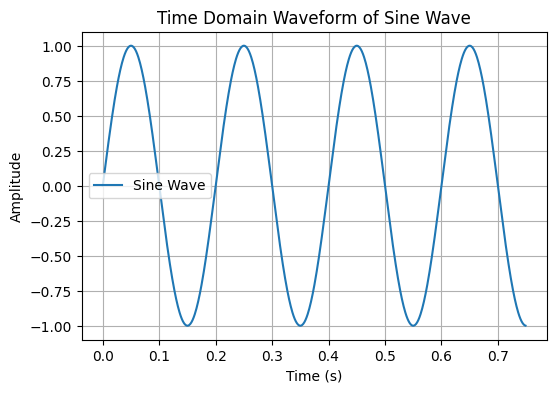

In [21]:
# @title 1) Generate a sinusoidal signal
import matplotlib.pyplot as plt
t=0.75 #time period
fs=1000 #sampling Frequency Hz
time=np.linspace(0,t,int(t*fs),endpoint=False)

#generating sine wave
freq=5 #frequency in hertz
sin_wave=np.sin(2*np.pi*freq*time)


#plotting the time domain waveform of sine wave
plt.figure(figsize=(6,4))
plt.plot(time,sin_wave)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Sine Wave'])
plt.title('Time Domain Waveform of Sine Wave')
plt.grid(True)
plt.show

Sine wave is the periodic whose waveform is the trignometric sine Function it exhibits periodic oscillation at intvervals which are smooth and it ranges from -1 to 1

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


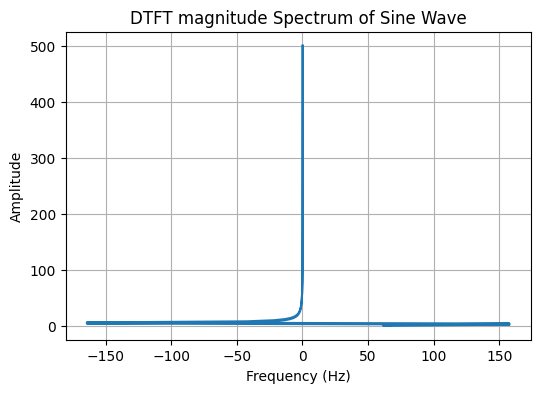

In [5]:
#Computing discrete time Fourier Transform on the time domain waveform
def dtft(x,fs):
  X=np.fft.fftshift(np.fft.fft(x,512))
  freq=np.linspace(-fs/2,fs/2,len(X))
  return X,freq

freq_DTFT,X_DTFT=dtft(sin_wave,fs)

#Plot the DTFT
plt.figure(figsize=(6,4))
plt.plot(freq_DTFT,np.abs(X_DTFT))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('DTFT magnitude Spectrum of Sine Wave')
plt.grid(True)
plt.show()



Fourier Transforms helps in analyzing signals such as audio to image processing to compression
first let us go through Fourier series which is defined by any function that is periodic in nature can be written in the sum of trigonomentric or exponential functions with specific functions

fourier Transform any general function that neednt be periodic but can be continuous integral of trigonometric or exponential functions


Why  Fourier transform ?
it is used in many application in terms of speech recognition related transforms to recover any spokent words from raw



DFT-in Discrete fourier transform it converts a finite sequences of equally spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency.
The interval at which the DTFT is sampled is the reciprocal of the duration of the input sequence.An inverse DFT (IDFT) is a Fourier series, using the DTFT

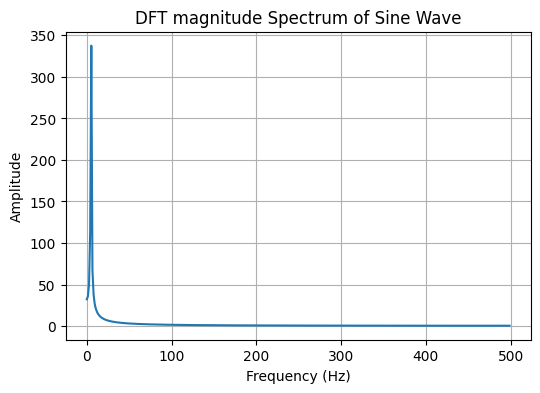

In [6]:
dft=np.fft.fft(sin_wave)
frequencies=np.fft.fftfreq(len(sin_wave),1/fs)

plt.figure(figsize=(6,4))
plt.plot(frequencies[:len(frequencies)//2],np.abs(dft[:len(dft)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('DFT magnitude Spectrum of Sine Wave')
plt.grid(True)
plt.show()

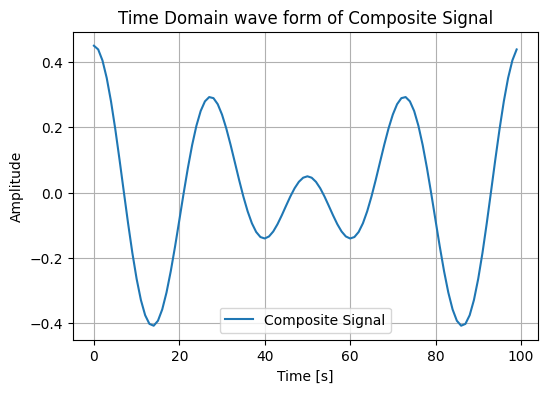

In [7]:
# @title 2)Question 2 Generate a composite signal by adding two or more sinusoidal signals of different frequencies and amplitudes.
N=100
n=np.arange(N)

#signal1
f1=3/N
a1=0.2
signal1=a1*np.cos(2*np.pi*f1*n)

#signal2
f2=4/N
a2=0.5
signal2=a2*np.cos(2*np.pi*f2*n)


#adding the two signals
composite_signal=signal1+0.5*signal2

plt.figure(figsize=(6,4))
plt.plot(n, composite_signal,label="Composite Signal: Signal 1 + 0.5 * Signal 2")
plt.title('Time Domain wave form of Composite Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(['Composite Signal'])
plt.show()



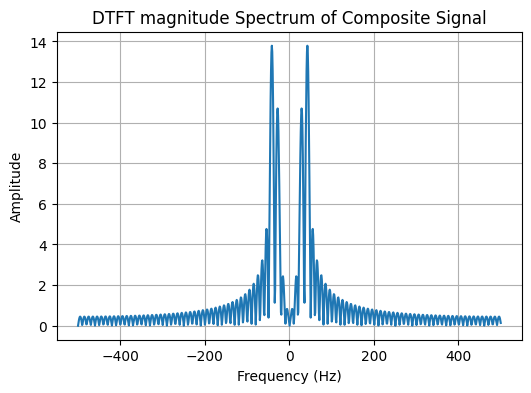

In [8]:
# @title (c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum for composite signals
def dtft(x,fs):
  X=np.fft.fft(x,1024) # Use zero-padding for better frequency resolution
  X=np.fft.fftshift(X)
  freq=np.linspace(-fs/2,fs/2,len(X))
  return X,freq

X,freq=dtft(composite_signal,fs)

#plot the Continuous frequency distribution
plt.figure(figsize=(6,4))
plt.plot(freq,np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('DTFT magnitude Spectrum of Composite Signal')
plt.grid(True)

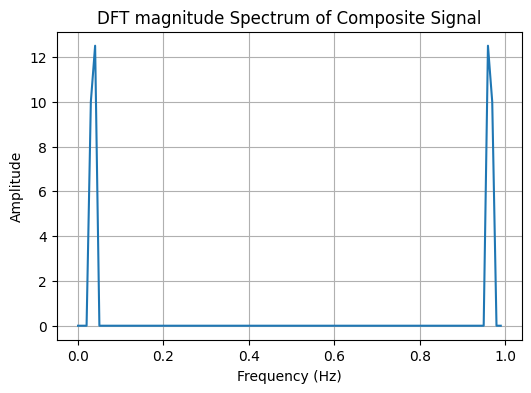

In [9]:
#DFT
dft=np.fft.fft(composite_signal)
#frequency axis
N=100
k=np.arange(N)
freq=k/N

plt.figure(figsize=(6,4))
plt.plot(freq,np.abs(dft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('DFT magnitude Spectrum of Composite Signal')
plt.grid(True)

A composite signal is made of many simple sine waves. A single frequency sine wave is not useful in data communications; we need to send a composite signal, a signal made of many simple sine waves.

Text(0.5, 1.0, 'Time Domain Waveform of Exponential Decay Signal')

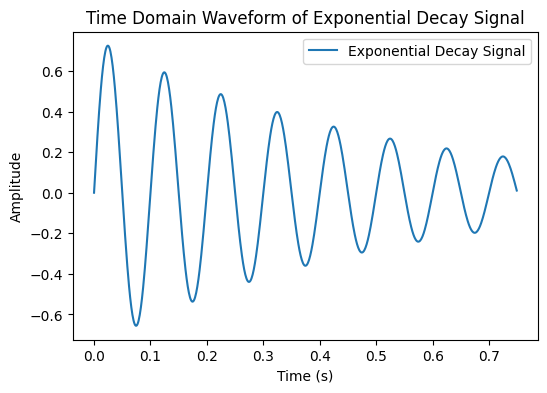

In [10]:
# @title exponentially decaying Signal
def exp_decay(a,time,rate):
  fs=1000
  f=10
  time=np.arange(0,t,1/fs)
  exp_decay=a*np.exp(-rate*time)*np.sin(2*np.pi*f*time)
  return exp_decay,time

a=np.random.rand()
rate=2
exp_decay,time=exp_decay(a,time,rate)


plt.figure(figsize=(6,4))
plt.plot(time,exp_decay)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Exponential Decay Signal'])
plt.title('Time Domain Waveform of Exponential Decay Signal')


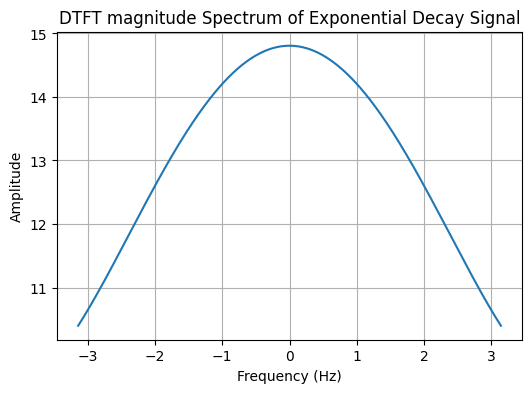

In [11]:
#compute DTFT for Exponenential Decay
def dtft_exp_decay(exp_decay,fs):
  fs=1000
  time=np.arange(0,t,1/fs)
  f=10
  exp_decay=a*np.exp(-rate*time)*np.sin(2*np.pi*f*time)
  omega=np.linspace(-np.pi,np.pi,1000)
  #compute dtft
  X=np.array([np.sum(exp_decay*np.exp(-1j*w*time)) for w in omega])
  return X,omega


x,omega=dtft_exp_decay(exp_decay,fs)

plt.figure(figsize=(6,4))
plt.plot(omega,np.abs(x))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('DTFT magnitude Spectrum of Exponential Decay Signal')
plt.grid(True)



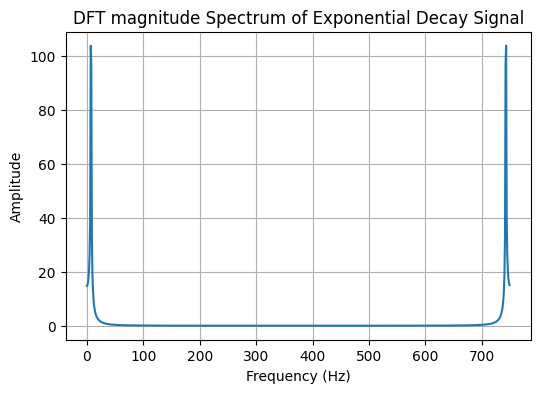

In [12]:
#DFT
N=len(exp_decay)
dft=np.fft.fft(exp_decay)

plt.figure(figsize=(6,4))
plt.plot(np.arange(N),np.abs(dft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('DFT magnitude Spectrum of Exponential Decay Signal')
plt.grid(True)

when analysing the exponentially decaying sinusoid that has the amplitude decaying over a period of time the frequency component that is corresponding to the combined sinusoidal frequency of 12 Hz and the decay affects the width and the shape of the time domain frequency spectrum when we increase the frequency the waves increases and the width reduces  indicating that almost most of the frequency lies in the sinusoidal signal

Text(0.5, 1.0, 'Time Domain Waveform of Rectangular Signal')

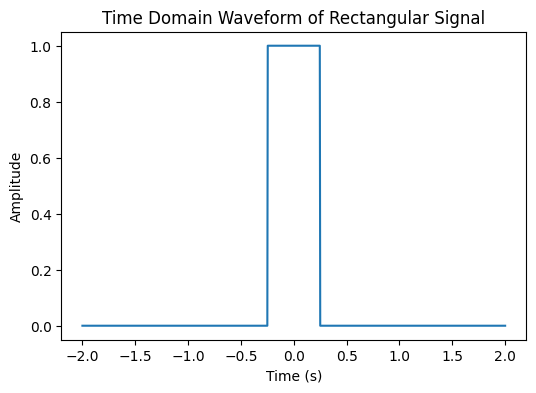

In [13]:
# @title Question 4 Generate a rectangular signal
def rectangular_signal(t,tau):
  return np.where(np.abs(t)<=tau/2,1,0)

#paramenters
tau=0.5
fs=1000
t=np.linspace(-2,2,fs)

rectsignal=rectangular_signal(t,tau)

plt.figure(figsize=(6,4))
plt.plot(t,rectsignal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain Waveform of Rectangular Signal')

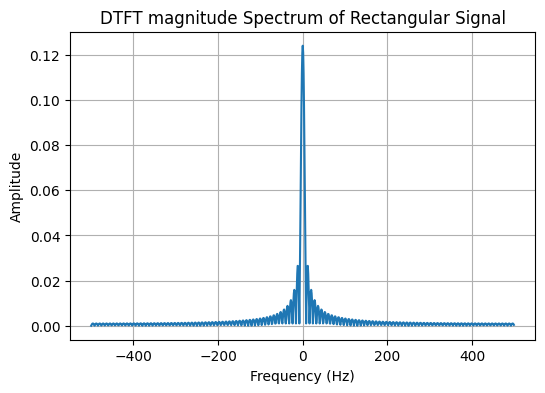

In [14]:
#Dtft for Rectangular signal
def dtft(signal,fs):
  N=len(signal)
  f=np.fft.fftfreq(N,1/fs)
  dtft_signal=np.fft.fft(signal)
  shifted_dtft=np.fft.fftshift(dtft_signal)#Shift zero frequency to center
  f_shifted=np.fft.fftshift(f)#shifting frequency vector
  return f_shifted,shifted_dtft

freq,dtftrect_signal=dtft(rectsignal,fs)

plt.figure(figsize=(6,4))
plt.plot(freq,np.abs(dtftrect_signal)/len(rectsignal))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('DTFT magnitude Spectrum of Rectangular Signal')
plt.grid(True)

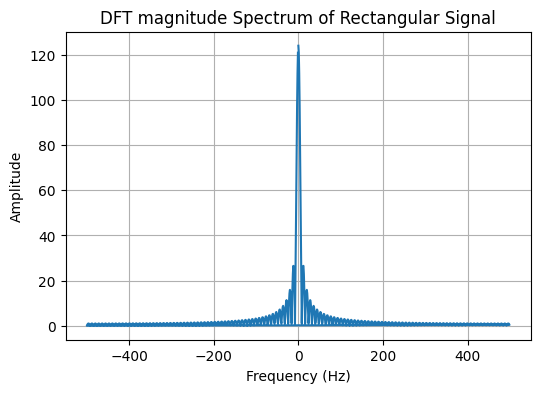

In [15]:
#DFT signal for Rectangular Signal
def dft(signal):
  N=len(signal)
  dft_signal=np.fft.fft(signal)
  freq=np.fft.fftfreq(N,1/fs)
  return freq,dft_signal

freq,dftrect_signal=dft(rectsignal)

plt.figure(figsize=(6,4))
plt.plot(freq,np.abs(dftrect_signal))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('DFT magnitude Spectrum of Rectangular Signal')
plt.grid(True)

when we analyze the time domain and frequency domain relationship we see that in  time domain the amplitude changes over time where when computing the DFT and DTFT we see thatthe signal wave is distributed equally across the frequency component
here we see that a wider rectangular pulse results in a narrower sinc function in the frequency domain, indicating fewer high-frequency components and more concentration of energy in low frequencies.whereas a narrow narrow rectangular pulse in the time domain results in a broader sinc function in the frequency domain, implying that more high-frequency components are required to reconstruct the sharp edges of the pulse.